In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'axes.titlesize' : 22,
          'axes.labelsize' : 20,
          'legend.fontsize': 18,
          'legend.title_fontsize': 22,
          'figure.titlesize': 24
          }
pylab.rcParams.update(params)

In [ ]:
#importing the dataset
df = pd.read_csv("TweetSentiment.csv", encoding='latin1')

In [ ]:
df = df[['text', 'sentiment']]

In [ ]:
df

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [ ]:
# Insight 1:

#calculate the different length of the tweets
positive_tweets = df[df['sentiment'] == 'positive'].copy()
negative_tweets = df[df['sentiment'] == 'negative'].copy()
neutral_tweets = df[df['sentiment'] == 'neutral'].copy()

positive_tweets.loc[:, 'tweet_length'] = positive_tweets['text'].str.len()
negative_tweets.loc[:, 'tweet_length'] = negative_tweets['text'].str.len()
neutral_tweets.loc[:, 'tweet_length'] = neutral_tweets['text'].str.len()

average_lengths = [
    positive_tweets['tweet_length'].mean(),
    negative_tweets['tweet_length'].mean(),
    neutral_tweets['tweet_length'].mean()
]

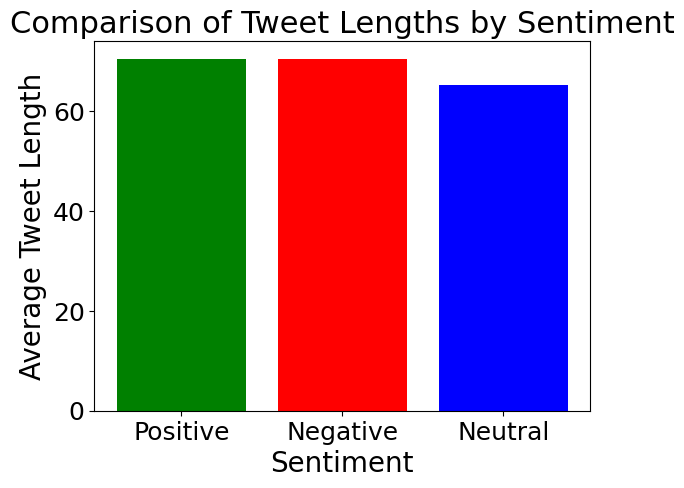

In [ ]:
# Define colors for each sentiment
colors = ['green', 'red', 'blue']

# Plot the graph
sentiments = ['Positive', 'Negative', 'Neutral']
plt.bar(sentiments, average_lengths, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Average Tweet Length')
plt.title('Comparison of Tweet Lengths by Sentiment')
plt.show()

In [ ]:
# Insight 2:

category_counts = df.groupby('sentiment')['text'].apply(lambda x: x.str.split().explode().nunique())
total_unique_words = df['text'].str.split().explode().nunique()
print("Unique Words in Each Category:")
print(category_counts)

print("\nTotal Unique Words in the Dataset:")
print(total_unique_words)

Unique Words in Each Category:
sentiment
negative    20397
neutral     27043
positive    21802
Name: text, dtype: int64

Total Unique Words in the Dataset:
52270


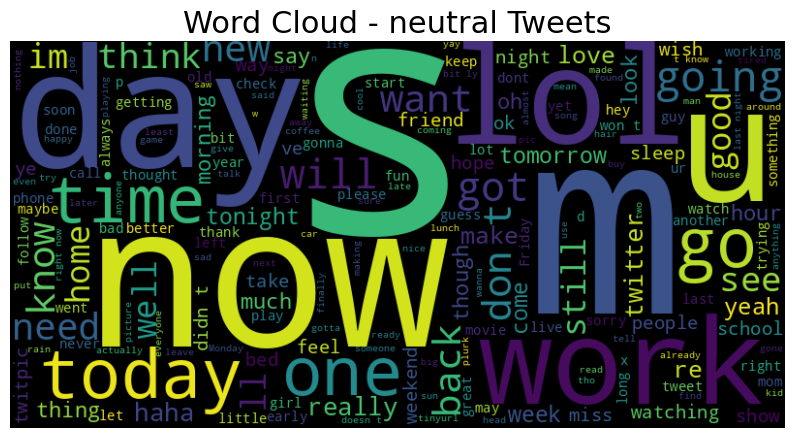

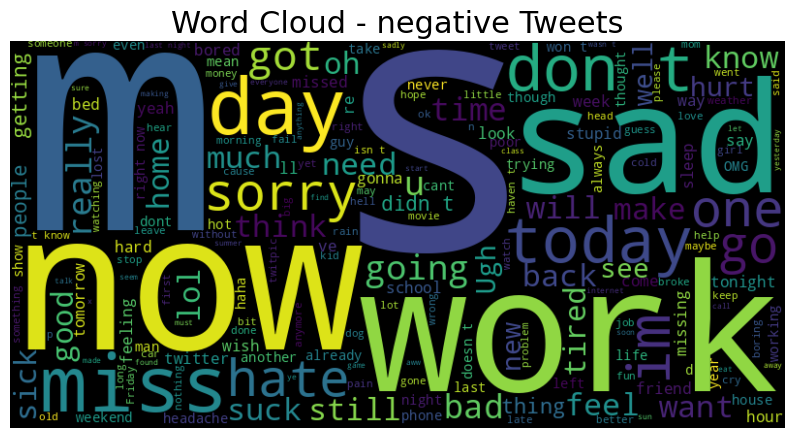

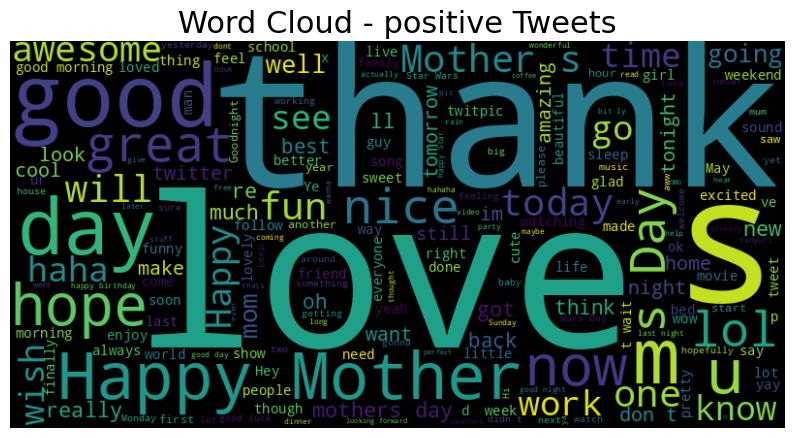

In [ ]:
# insight 3:
from wordcloud import WordCloud, STOPWORDS
categories = df['sentiment'].unique()

for category in categories:
    # Select tweets for the current category
    tweets = df[df['sentiment'] == category]['text']

    # Convert tweets to string and handle missing values
    tweets = tweets.astype(str)
    tweets = tweets.dropna()

    # Concatenate all tweets into a single string
    text = ' '.join(tweets)

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - {category} Tweets')
    plt.axis('off')
    plt.show()

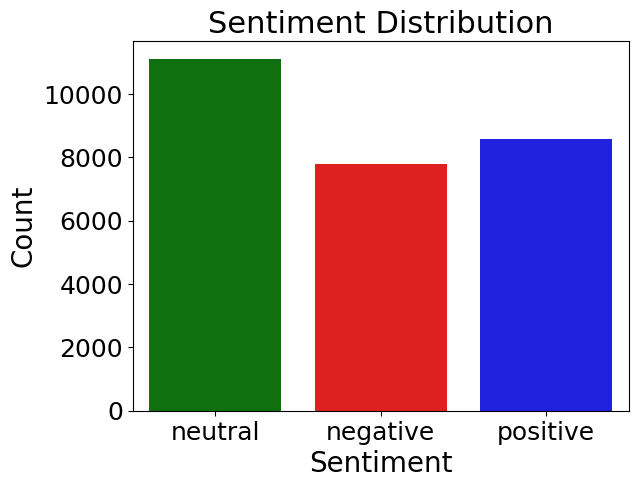

In [ ]:
# Insight 4: Sentiment distribution

# To better understand our dataset, we can also examine the distribution of sentiments in our dataset.
# This will help us to identify if we are dealing with a balanced or imbalanced dataset.

# Plot sentiment distribution
sns.countplot(x='sentiment', data=df, palette=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


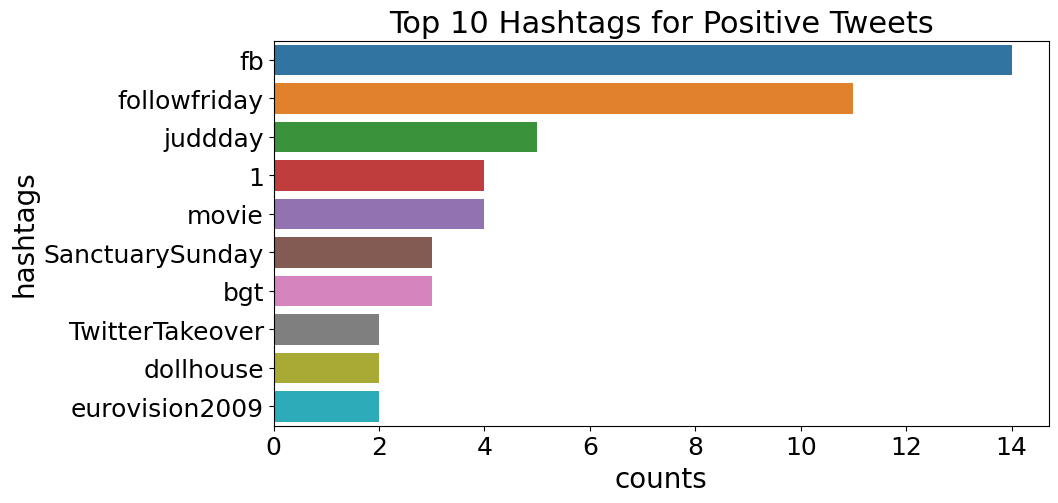

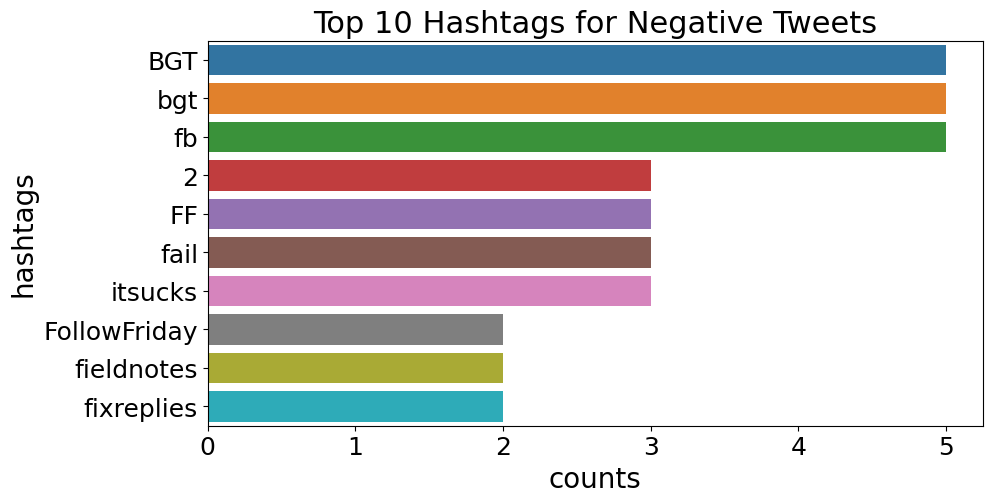

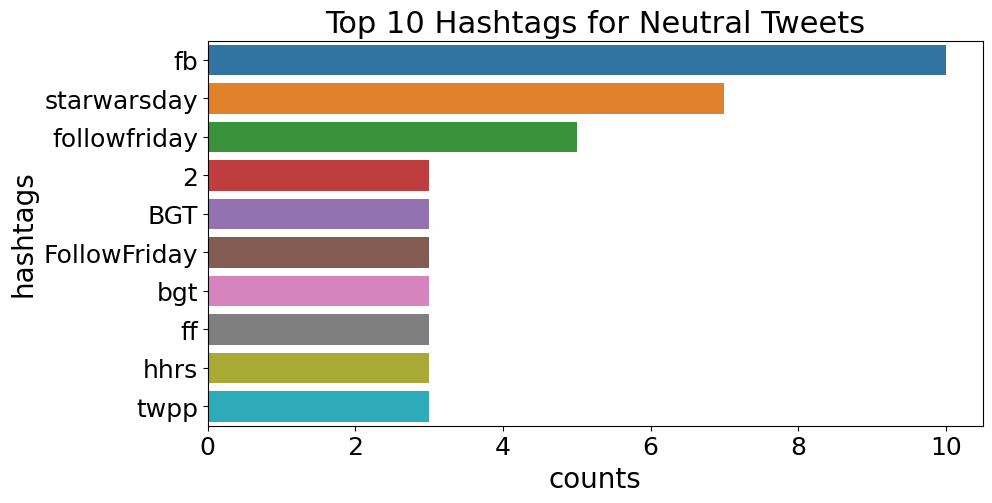

In [ ]:
# insight : 10 most commonly used hashtags

df['text'] = df['text'].fillna('')

def find_hashtags(tweet):
    return ", ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", tweet)])

df['hashtags'] = df['text'].apply(find_hashtags)

df_hashtags = df[df['hashtags'] != '']
top_hashtags = df_hashtags.groupby(['sentiment', 'hashtags']).size().reset_index(name='counts')

top_10_positive_hashtags = top_hashtags[top_hashtags['sentiment'] == 'positive'].nlargest(10, 'counts')
top_10_negative_hashtags = top_hashtags[top_hashtags['sentiment'] == 'negative'].nlargest(10, 'counts')
top_10_neutral_hashtags = top_hashtags[top_hashtags['sentiment'] == 'neutral'].nlargest(10, 'counts')

def plot_top_hashtags(df, title):
    plt.figure(figsize=(10,5))
    sns.barplot(data=df, y='hashtags', x='counts')
    plt.title(f'Top 10 Hashtags for {title} Tweets')
    plt.show()

plot_top_hashtags(top_10_positive_hashtags, 'Positive')
plot_top_hashtags(top_10_negative_hashtags, 'Negative')
plot_top_hashtags(top_10_neutral_hashtags, 'Neutral')


## Task 2

In [ ]:
# Text Cleaning
def clean_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Remove mentions
        text = re.sub(r'@\w+', '', text)
        # Remove special characters and emojis
        text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['clean_text'] = df['text'].apply(clean_text)

# Tokenization
tokenizer = TweetTokenizer()
df['tokens'] = df['clean_text'].astype(str).apply(tokenizer.tokenize)

# Stop Word Removal
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

# Handling Missing Values
df = df.dropna()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,text,sentiment,hashtags,clean_text,tokens
0,"I`d have responded, if I were going",neutral,,Id have responded if I were going,"[id, respond, i, go]"
1,Sooo SAD I will miss you here in San Diego!!!,negative,,Sooo SAD I will miss you here in San Diego,"[sooo, sad, i, miss, san, diego]"
2,my boss is bullying me...,negative,,my boss is bullying me,"[boss, bulli]"
3,what interview! leave me alone,negative,,what interview leave me alone,"[interview, leav, alon]"
4,"Sons of ****, why couldn`t they put them on t...",negative,,Sons of why couldnt they put them on the rel...,"[son, couldnt, put, releas, alreadi, bought]"
...,...,...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,,wish we could come see u on Denver husband l...,"[wish, could, come, see, u, denver, husband, l..."
27477,I`ve wondered about rake to. The client has ...,negative,"agile, ccnet",Ive wondered about rake to The client has ma...,"[ive, wonder, rake, the, client, made, clear, ..."
27478,Yay good for both of you. Enjoy the break - y...,positive,,Yay good for both of you Enjoy the break you...,"[yay, good, enjoy, break, probabl, need, hecti..."
27479,But it was worth it ****.,positive,,But it was worth it,"[but, worth]"


# Task 3

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Split the data:
X = df['tokens']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
#Checking the disribution:

class_counts_train_resampled = y_train.value_counts()

print("Class Distribution in Resampled Training Dataset:")
print(class_counts_train_resampled)

Class Distribution in Resampled Training Dataset:
neutral     8894
positive    6865
negative    6225
Name: sentiment, dtype: int64


In [ ]:
#The class is balanced so we don't need to under or over-sample

# Naïve Bayes Model with CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

y_pred = naive_bayes.predict(X_test_vectorized)
print("Naïve Bayes Model with CountVectorizer:")
print(classification_report(y_test, y_pred))

# Naïve Bayes Model with Bag of N-Gram (CountVectorizer)
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

y_pred = naive_bayes.predict(X_test_vectorized)
print("Naïve Bayes Model with Bag of N-Gram (CountVectorizer):")
print(classification_report(y_test, y_pred))

# Naïve Bayes Model with TF-IDF (TfidfVectorizer)
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

y_pred = naive_bayes.predict(X_test_vectorized)
print("Naïve Bayes Model with TF-IDF (TfidfVectorizer):")
print(classification_report(y_test, y_pred))


AttributeError: ignored

In [ ]:

# Compare the impact of different pre-processing pipelines

# Naïve Bayes Model without Stop Word Removal
stop_words = None

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

y_pred = naive_bayes.predict(X_test_vectorized)
print("Naïve Bayes Model without Stop Word Removal:")
print(classification_report(y_test, y_pred))

# Naïve Bayes Model without Stemming
stemmer = None

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

y_pred = naive_bayes.predict(X_test_vectorized)
print("Naïve Bayes Model without Stemming:")
print(classification_report(y_test, y_pred))

# Perform error analysis on the model's prediction
errors = X_test[y_test != y_pred]
error_labels = y_test[y_test != y_pred]
predicted_labels = y_pred[y_test != y_pred]

error_analysis = pd.DataFrame({'Text': errors, 'True Label': error_labels, 'Predicted Label': predicted_labels})
print("Error Analysis:")
print(error_analysis)